In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
data= pd.read_csv("Task 3 and 4_Loan_Data.csv")

In [13]:
data

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0
...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0


<Axes: ylabel='Frequency'>

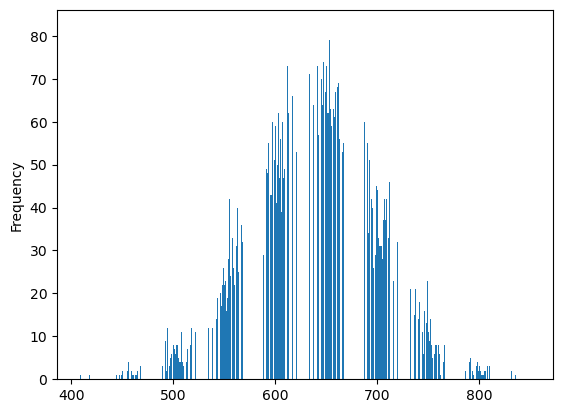

In [14]:
data["fico_score"].plot.hist(bins=1000)

In [15]:
#data["buckets"]= pd.qcut(data["fico_score"], q = 8, labels = False)

In [16]:
data

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0
...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0


In [68]:
def find_squared_error(fico_bucket):
    ni= len(fico_bucket)
    ki = fico_bucket["default"].sum()
    mse = ((fico_bucket["default"]-(ki/ni))**2).sum()
    return mse

In [70]:
def find_mse(infodf):
    total_sum_mse = 0
    for bucket in range(infodf["buckets"].max()+1):
        bucket_data = infodf[infodf["buckets"]==bucket]
        total_sum_mse+= find_squared_error(bucket_data)
    return total_sum_mse/len(infodf)

In [166]:
def optimise_buckets(data_df):
    mean_mse_vals= []
    for i in range(2,15):
        data_df["buckets"]= pd.qcut(data_df["fico_score"], q = i, labels = False).astype(int)
        mean_mse = find_mse(data_df)
        mean_mse_vals.append((mean_mse,i))
    min_mean_mse = min(mean_mse_vals, key= lambda x:x[0])
    bucket_counts, mse_values = zip(*mean_mse_vals)
    
    plt.plot(bucket_counts, mse_values, marker='o')
    plt.xlabel("Mean Squared Error")
    plt.ylabel("Number of Buckets")
    plt.title("MSE vs. Number of Buckets")
    plt.show()
    return min_mean_mse
    

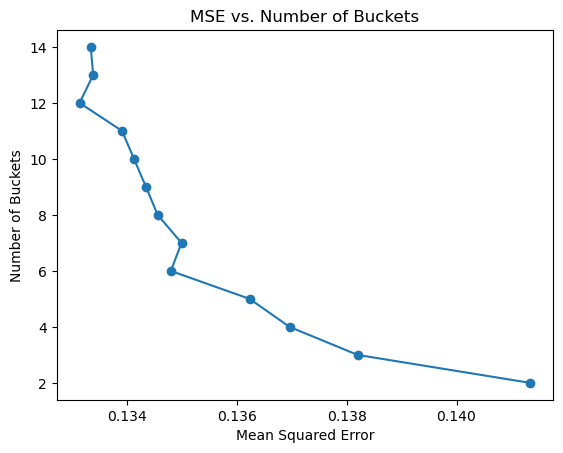

(0.133132155577653, 12)

In [168]:
optimise_buckets(data)